<a href="https://colab.research.google.com/github/SergeyS1954/LW_TR/blob/main/LW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 4


## Бездефицитная схема ремонта

Рассмотрим случай, когда количество ремонтников гарантирует, что при каждом отказе элемента найдется свободный ремонтник,  который немедленно начинает процесс восстановления ($M = N$).

Параметры процесса размножения-гибели для данного случая:
$$
		\lambda_k  =  (N - k)\lambda,  k = 0,1, \dots, N-1,   
$$
		и
$$
	\mu_k  =    k \mu, \ k = 1,2,  \dots, N.  
$$
В данном случае формулы стационарных вероятностей преобразуются к виду:
$$
  \pi_k = \binom{N}{k}\rho^k \pi_0, \ \  k = 0,1, \dots, N.  
$$

Из условий нормировки
$$
\pi_0 = \left( \sum_{k=0}^{N} \binom{N}{k}\rho^k \right)^{-1}  = \frac{1}{(1 + \rho)^N}.  
$$

Проиллюстрируем бездефицитную схему ремонта для случая $N = 2,3,4$.

Построим графики стационарных вероятностей  нахождения в ремонте всех элементов системы.


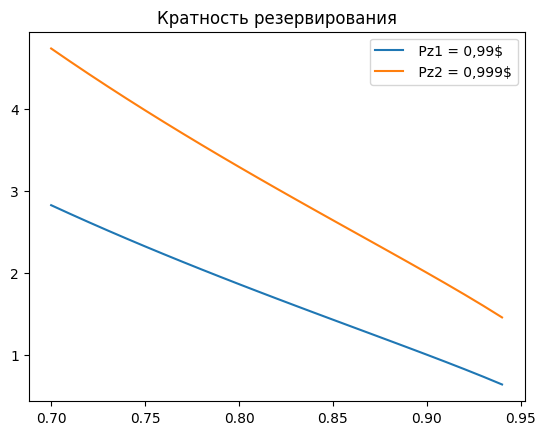

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
Pz1 = 0.99
Pz2 = 0.999
p0 = np.arange (0.7, 0.95, 0.01)
y1 = (np.log(1-Pz1))/(np.log(1-p0)) -1
y2 = (np.log(1-Pz2))/(np.log(1-p0)) -1
plt.plot(p0,y1, label = " Pz1 = 0,99$")
plt.plot(p0,y2, label = " Pz2 = 0,999$")
plt.legend()
plt.title('Кратность резервирования')
plt.show()

На графике значение $m$ действительное, а не целое. Какие практические рекомендации о выборе $m$ можно дать, исходя из приведенных данных?

# Модель с конечным источником нагрузки
Рассмотрим замкнутую систему,  которая состоит из $N$ элементов, каждый из которых может создать требование на обслуживание, связанное с его отказом.

Система $S_1$ формирует  "входящий поток",  который состоит из  случайного конечного число $N$ требований, а система $S_2$ осуществляет "обслуживание".
Пусть в системе $S_1$  "время жизни" каждого элемента распределено по экспоненциальному закону с параметром $\lambda$.

Система $S_2$ состоит из  $M$ однотипных "восстанавливающих" устройств. В случае выхода элемента из строя он начинает сразу восстанавливаться одним из свободных восстанавливающих устройств. Время восстановления является случайной величиной, распределенной по экспоненциальному закону с параметром $\mu$. Если все восстанавливающие устройства заняты, отказавший элемент встает в очередь и ждет до тех пор, пока  какое-либо восстанавливающее устройство освободится.

Обслуживание осуществляется в соответствии с естественной дисциплиной: "Первый пришел --- первый обслужен" $(FCFS)$.

Bсследуемый процес является процессом размножения-гибели, для которого известно решение в общем виде.

Уравнения баланса выглядят следующим образом:
$$
		\lambda_0 \pi_0  =  \mu_1 \pi_1, \\
	  (\lambda_{k} + \mu_{k}) \pi_k    
	=  \lambda_{k-1}\pi_{k-1} +  \mu_{k+1}\pi_{k+1},  \  1\leq k < N, \\
		\mu_{N}\pi_N   =  \lambda_{N-1}\pi_{N-1}.
$$

Обозначим $\rho_{i} = \frac {\lambda_{i-1}}{\mu_i}, \  i=1,2,\dots,N$.
Из первого равенства уравнения баланса  получаем
$$
\pi_1 =  \rho_1 \pi_0.
$$
Из второго равенства уравнения баланса  (\ref{g_fi_11})
$$
(\lambda_1 + \mu_1) \pi_1 = \lambda_0 \pi_0 + \mu_2\pi_2
$$
получаем
$$
\pi_2 = \frac{\lambda_0\lambda_1}{\mu_1\mu_2} \pi_0 = \rho_1\rho_2 \pi_0.
$$

Продолжаем рекуррентные вычисления:
$$
	\pi_k = \frac{\lambda_0\lambda_1\dots\lambda_{k-1}}{\mu_1\mu_2\dots\mu_k} \pi_0  = \prod_{i=1}^k \rho_i \pi_0, \  1\leq k \leq N.
$$

С учетом условий нормировки $ \sum_{i = 0}^{N}\pi_i = 1 $ получаем
$$  \pi_0 = \left( 1 + \rho_1 + \dots +  \prod_{i=1}^N \rho_i\right)^{-1}.  
$$



##Модель с единственным устройством восстановления

Рассмотрим вариант с единственным устройством восстановления.
В этом случае
$$  
\lambda_k  = (N - k)\lambda, \  k = 0,1, \dots, N,  
$$
а
$$
\mu_k  =  \mu,  k = 0,1, \dots, N.
$$

Обозначим через $\rho$ отношение интенсивности отказов к интенсивности восстановления $\rho = \frac{\lambda}{\mu}$. Тогда общая формула преобразуется к виду:
$$
\pi_0 = \left( 1 + \frac{N!}{(N-1)!}\rho + \cdots + N!\rho^N \right)^{-1}.  
$$

Операционная характеристика --- среднее число отказавших (находящихся на обслуживании устройством восстановления) элементов.
По определению:
$$  N_T = \sum_{i=1}^{N}i \pi_i.  
$$   
Анализ начнем с простейшей ситуации --- **2** устройства.
Из формул для вероятностей состояний следует:
$$  \pi_0 = \frac{1}{1+ 2\rho + 2\rho^2}; \nonumber \\
\pi_1 = \frac{2\rho}{1+ 2\rho + 2\rho^2}; \nonumber \\
\pi_2 = \frac{2\rho^2}{1+ 2\rho + 2\rho^2}.
$$

На представленном графике показаны вероятности $\{\pi_0, \pi_1$ и $\pi_2 \}$ нахождения модулей в ремонте.

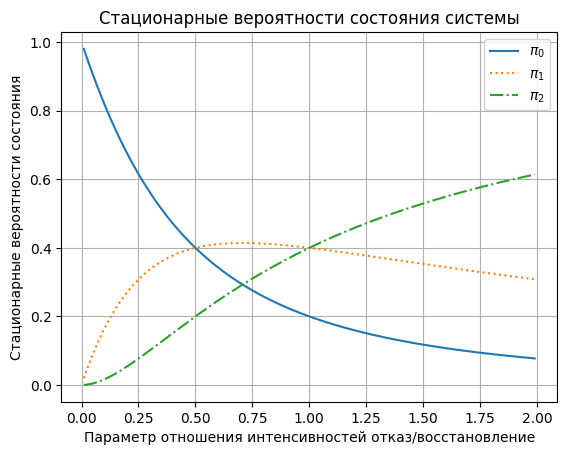

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
pi0 = 1/(1 + 2*ro + 2*ro**2)
pi1 = 2*ro/(1 + 2*ro + 2*ro**2)
pi2 = (2*ro**2)/(1 + 2*ro + 2*ro**2)
plt.plot(ro,pi0,'-',label = '$\pi_0$')
plt.plot(ro,pi1,':',label = '$\pi_1$')
plt.plot(ro,pi2,'-.',label = '$\pi_2$')
plt.title('Стационарные вероятности состояния системы')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Стационарные вероятности состояния')
plt.legend()
plt.grid(True)
plt.show()



На представленном графике показано изменение среднего числа элементов, находящихся в ремонте в зависимости от значений параметра $\rho$.  


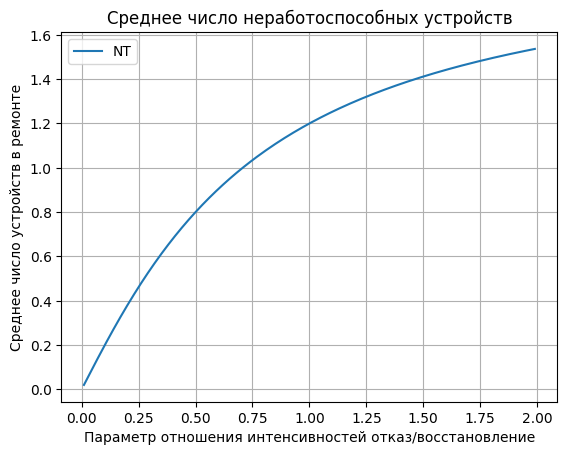

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
NT = (2*ro*(2*ro + 1))/(1 + 2*ro + 2*ro**2)
plt.plot(ro,NT,label = 'NT')
plt.title('Среднее число неработоспособных устройств')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Среднее число устройств в ремонте') #plt.show()
plt.legend()
plt.grid(True)
plt.show()


Коэффициент готовности системы по определению равен
$$  K_r = \pi_0 + \pi_1 = \frac{1 + 2\rho}{1+ 2\rho + 2\rho^2}.  
$$

Обратите внимание, что на содержательном уровне модель с двумя элементами и одним устройством восстановления тождественна модели нагруженного резервирования с ограниченным восстановлением.


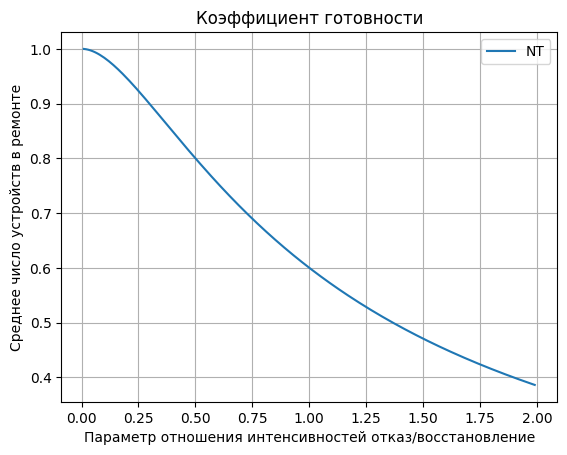

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
Kg = (2*ro + 1)/(1 + 2*ro + 2*ro**2)
plt.plot(ro,Kg,label = 'NT')
plt.title('Коэффициент готовности')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Среднее число устройств в ремонте') #plt.show()
plt.legend()
plt.grid(True)

plt.show()

Выполним анализ ситуации для варианта  с **3** источниками нагрузки.
Из общих формул для стационарных вероятностей при $N = 3$ получаем
$$  
		\pi_0 = \frac{1}{1+ 3\rho + 6\rho^2 + 6\rho^3}; \nonumber \\
		\pi_1 = \frac{3\rho}{1+ 3\rho + 6\rho^2 + 6\rho^3}; \nonumber \\
		\pi_2 = \frac{6\rho^2}{1+ 3\rho + 6\rho^2 + 6\rho^3}; \nonumber \\
		\pi_3 = \frac{6\rho^3}{1+ 3\rho + 6\rho^2 + 6\rho^3}.
$$


Среднее число нерабочих (находящихся на обслуживании) элементов:
$$
 N\_R3 = 1 \pi_1 + 2 \pi_2 + 3 \pi_3 = \frac{3\rho}{1+ 3\rho + 6\rho^2 + 6\rho^3} (1 + 4\rho + 6\rho^2).  
$$

Графики для расчета и сравнения среднего числа нерабочих (находящихся на обслуживании) элементов для $N = 2$ и $N = 3$ $N\_R2$ и $N\_R3$ соответственно приедставлены ниже.

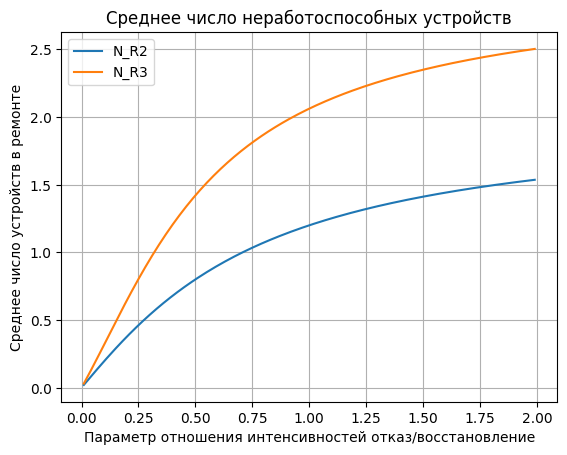

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ro = np.arange (0.01, 2.0, 0.01)
NT2 = (2*ro*(2*ro + 1))/(1 + 2*ro + 2*ro**2)
NT3 = (3*ro*(1 + 4*ro + 6*ro**2))/(1 + 3*ro + 6*ro**2 + 6*ro**3)
plt.plot(ro,NT2,label = 'N_R2')
plt.plot(ro,NT3,label = 'N_R3')
plt.title('Среднее число неработоспособных устройств')
plt.xlabel('Параметр отношения интенсивностей отказ/восстановление')
plt.ylabel('Среднее число устройств в ремонте')
plt.legend()
plt.grid(True)
plt.show()

# Оценивание параметров систем в теории надежности

## Постановка задачи оценивания параметра системы

Пусть имеется выборка $x_1, \dots, х_n$ из генеральной совокупности с плотностью распределения $f (х, \theta)$. Предполагается, что функция плотности распределения $f (х, \theta)$ определена с точностью до неизвестного параметра $\theta$.

Ставится задача определения по выборке $x_1, \dots, х_n$ значения параметра $\theta$, которое в некотором смысле является наилучшей оценкой неизвестного параметра $\theta$.

*Точечной оценкой* неизвестного параметра или числовой характеристики распределения называется функция наблюдений $\hat\theta = \hat\theta(x_1, \dots, х_п)$, которая принимается приближенно равной  $\theta$.

Пример точечной оценки. Пусть выборка $x_1, \dots, х_п$ получена из генеральной совокупности нормально распределенной случайной величины с плотностью распределения

$$	f(x,\theta) =  \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(x - \theta)^2}{2} \right).$$


Параметр $\theta$ --- это неизвестный параметр, равный математическому ожиданию случайной величины.

Точечными оценками параметра могут служить различные статистики, в частности, выборочное среднее

$$
	\hat\theta =  \bar x = \frac{1}{n}\sum_{i = 1}^{n} x_i.
$$

Так как наблюдения $x_1, \dots, х_п$ являются случайными величинами, то и статистика точечной оценки $ \hat\theta(x_1, \dots, х_п)$ будет случайной величиной.

Невозможно построить оценку, которая принимала бы значения, близкие к величине $\theta$, для всех возможных выборок.

Всегда существует ненулевая вероятность того, что на некоторых выборках могут быть получены значения, сильно отличающиеся от истинного значения $\theta$. Это естественное следствие использования вероятностных моделей.


## Интервальная оценка параметра надежности. Доверительные интервалы


*Доверительным интервалом* числовой характеристики или параметра $\theta$ называется интервал $(\theta_1, \theta_2$ со случайными границами, для которого выполняется:

$$
\mathbb P(\theta_1 < \theta <\theta_2) = \gamma.
$$

Величина $\gamma$ называется *доверительной вероятностью оценки*.

*Доверительная вероятность оценки* --- это вероятность, с которой истинное (неизвестное) значение  характеристики  случайной величины попадет в доверительный интервал.

Часто вместо доверительной вероятности $\gamma$  рассматривается вероятность

$$\alpha = 1 - \gamma,$$
которая называется  *уровнем значимости*.

Отметим, что  доверительный интервал для параметра $\theta$  не является единственным и различные методы по разному строят границы, которые приводят к различным значениям $\theta_1$ и $\theta_2$.
Более того, для *каждой конкретной выборки* получаются отличающиеся друг от друга границы доверительных интервалов.

### Пример. Доверительный интервал для нормального распределения

Дана выборка $x_1, x_2, \dots, x_n$ объема $n$ из генеральной совокупности, имеющей нормальное распределение. На ее основе  строим соответственно выборочное среднее $$
\bar x = \frac{1}{n}\sum_{i = 1}^{n} x_i$$
и выборочное среднее квадратическое отклонение
$$
S = \frac{1}{n}\sum_{i = 1}^{n} ( x_i - \bar x )^2.$$

Полагаем, что параметры $m$ и $\sigma$ нормального распределения неизвестны.

Для данной постановки задачи известно, что случайная величина
$$
Т =	\sqrt{n - 1} \cdot \frac{\bar X - m}{S}, $$

называемая статистикой Стьюдента, распределена в соответствии с распределением Стьюдента, с $n - 1$ степенями свободы.

Пусть задан уровень значимости $\alpha$.

Обозначим $t_{1 - \alpha/2}(n - 1)$ --- квантиль распределения Стьюдента с $n - 1$ степенями свободы порядка $1 - \alpha/2$.

$$
\mathbb P( \bar X -  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}} < m < \bar X +  \frac{S t_{1 - \alpha/2}(n - 1)}{\sqrt{n - 1}}) = 1 - \alpha,
$$
что, по определению, задает доверительный интервал для среднего значения $m$.

Пример нахождения доверительного интервала для математического ожидания генеральной совокупности нормально распределенных случайных величин $\mathcal{N}(5,1)$. Уровень значимости $\alpha = 0,05$.

Представлен график среднего значения для случайной выборки как функция длины $n$ и соответствующий доверительный интервал.

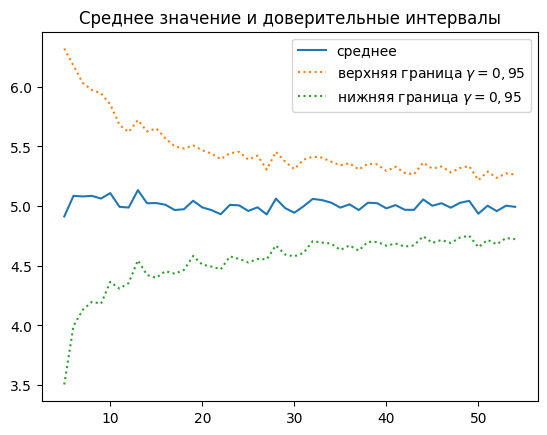

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
x1 = []
l1 = []
for st in range (5, 55, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l2 = np.array(l1)
yl = x2 - l2
yu = x2 + l2
st = np.arange(5,55,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu[st-5],':',label = r'верхняя граница $\gamma = 0,95$')
plt.plot(st,yl[st-5 ],':',label = r'нижняя граница $\gamma = 0,95$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()

Если задать более жесткий уровень значимости, например, положив $\alpha = 0.01$, то получаемые доверительные интервалы будут, естественно, более широкими. Представленный график наглядно иллюстрирует сформулированное свойство доверительных интервалов.


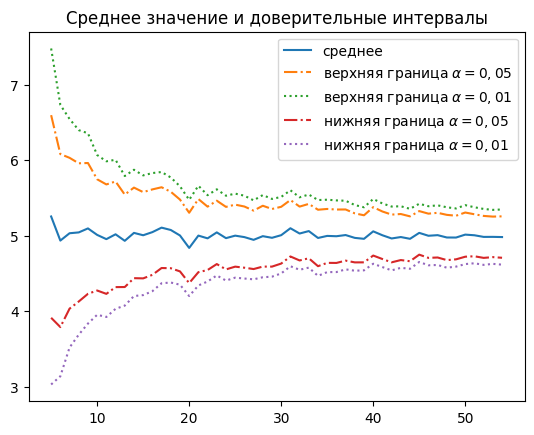

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
x1 = []
l1 = []
l2 = []
for st in range (5, 55, 1):
    test1 = np.random.normal(5,1,20*st)
    x1.append(np.mean(test1))
    l1.append((np.std(test1)*t.interval(0.95,st - 1 )[1])/np.sqrt(st-1))
    l2.append((np.std(test1)*t.interval(0.99,st - 1 )[1])/np.sqrt(st-1))
x2 = np.array(x1)
l1a = np.array(l1)
l2a = np.array(l2)
yl_095 = x2 - l1a
yl_099 = x2 - l2a
yu_095 = x2 + l1a
yu_099 = x2 + l2a
st = np.arange(5,55,1)
plt.plot(st,x2[st-5],label = 'среднее')
plt.plot(st,yu_095[st-5],'-.',label = r'верхняя граница $\alpha = 0,05$')
plt.plot(st,yu_099[st-5],':',label = r'верхняя граница $\alpha = 0,01$')
plt.plot(st,yl_095[st-5 ],'-.',label = r'нижняя граница $\alpha = 0,05$')
plt.plot(st,yl_099[st-5 ],':',label = r'нижняя граница $\alpha = 0,01$')
plt.legend()
plt.title('Среднее значение и доверительные интервалы')
plt.show()

### Построение доверительных интервалов для произвольно распределенных случайных величин

На основании центральной предельной теоремы можно заключить, что подходящим образом центрированные и нормированные суммы случайных величин при достаточно общих предположениях сходятся к  $\mathcal{N}(0,1)$.

Для заданной доверительной вероятности $\gamma$  вероятность попадания истинного (неизвестного) значение математического ожидания в доверительный интервал определяется корнем уравнения, определяющего такое значение $Y(\gamma)$, для которого $\gamma \%$ плотности распределения сосредоточено на интервале $-Y(\gamma), Y(\gamma)$.

В качестве оцениваемого параметра рассмотрим математическое ожидание случайной величины.

C вероятностью $\gamma$ истинное (неизвестное) значение математического ожидания в попадает в доверительный интервал:
$$
\left( \bar X - \frac{Y(\gamma) \cdot S}{\sqrt{n}},\bar X + \frac{Y(\gamma) \cdot S}{\sqrt{n}} \right),
$$
где $S =\sqrt{S^2}$.

Отметим, что для оценки математического ожидания нормально распределенной случайной величины использовалось распределения Стьюдента с $n-1$ степенями свободы, а для произвольного распределения используется стандартное нормальное распределение  $\mathcal{N}(0, 1)$.

### Пример. Доверительный интервал для экспоненциального распределения

Рассмотрим пример определения доверительного интервала для оценки математического ожидания случайной величины, имеющей экспоненциальное распределение с параметром $\lambda = 10$. На графике представлены результаты работы программы, которая строит доверительные интервалы для оценки математического ожидания для выборок размером от $n = 25$ до $n = 200$.

На графике приведена ширина доверительного интервала как функция объема выборки.

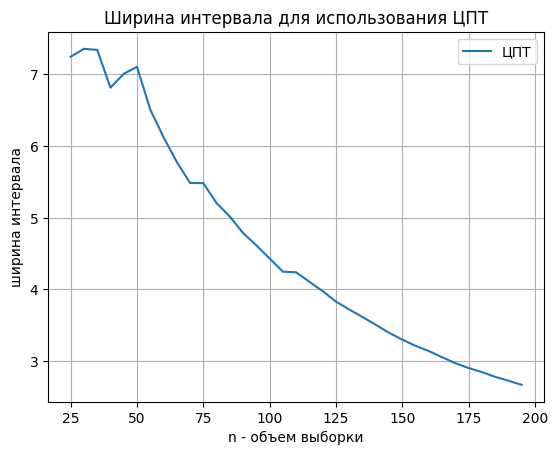

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
alpha = 0.05
gamma = 1 - alpha
f_1 = []

for n in range (25, 200, 5):
        np.random.seed(123567)
        test = np.random.exponential(10.,n)
        x = np.mean(test)
        # границы для приближения ЦПТ
        l = (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n)
        f_1.append(2* (np.std(test)*norm.ppf((1 + gamma)/2))/np.sqrt(n))
n = np.arange(25,200,5)
fig = plt.figure()   # Отрисовка данных
plt.plot (n,f_1, '-', label = 'ЦПТ')
plt.title('Ширина интервала для использования ЦПТ')
plt.xlabel('n - объем выборки')
plt.ylabel('ширина интервала')
plt.legend()
plt.grid(True)
plt.show()